## 파이썬 머신러닝 완벽가이드
### 9단원_ 추천 시스템

#### 01. 추천 시스템의 개요와 배경

추천 시스템의 개요<br>
***온라인 스토어의 필수 요소, 추천 시스템***<br>
한정된 시간이라는 제약을 가진 상황에서 너무 많은 상품과 콘텐츠는 오히려 사용자가 어떤 상품을 골라야 할지에 대한 압박감을 느끼게 만들 수밖에 없는데, 추천 시스템이 이러한 상황을 타개해준다.<br>
**=> 온라인 스토어에서 추천 시스템은 필수 구성 요소**
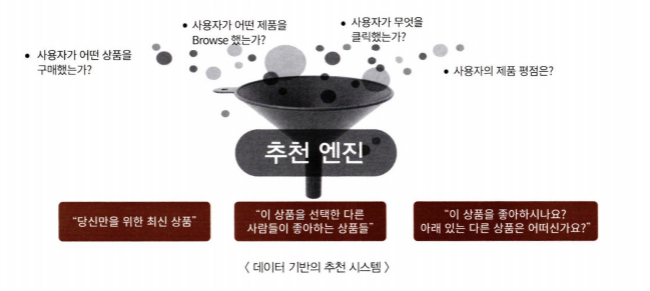


***추천 시스템의 유형***<br>
* 콘텐츠 기반 필터링(Content based filtering) 방식
* 협업 필터링(Collaborative Filtering) 방식
> * 최근접 이웃(Nearest Neighbor) 협업 필터링
> * 잠재 요인(Latent Factor) 협업 필터링



#### 02. 콘텐츠 기반 필터링 추천 시스템

* 콘텐츠 기반 필터링 방식은 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식
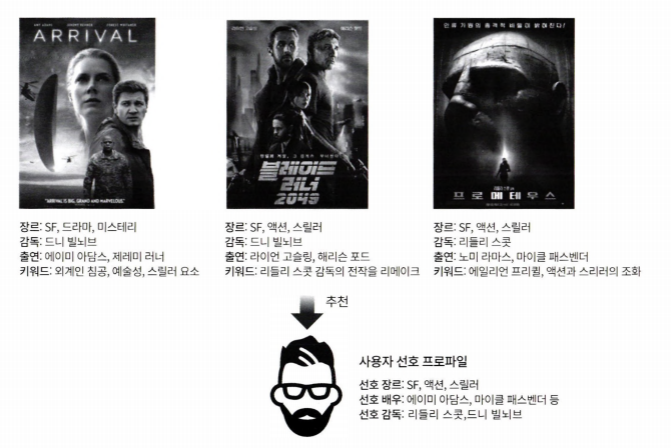


#### 03. 최근접 이웃 협업 필터링

* 협업 필터링(Collaborative Filtering) 방식 : 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것.
> 협업 필터링의 주요 목표는 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가
아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)하는 것.!
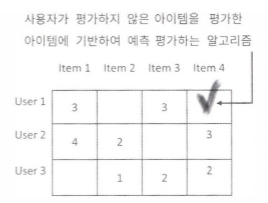<br>
=> 협업 필터링은 사용자가 평가한 다른 아이템을 기반으로 사용자가 평가하지 않은 아이템의 예측 평가를 도출하는 방식

* 협업 필터링 기반의 추천 시스템은 최근접 이웃 방식과 잠재 요인 방식으로 나뉘며. 두 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천을 수행.
* 협업 필터링 알고리즘에 사용되는 시용자-아이템 평점 행렬에서 행(Row)은 개별 사용자. 열(Column)은 개별 아이템으로 구성되며. 사용자 아이디 행, 아이템 아이디 열 위치에 해당하는 값이 평점을 나타내는 형태가 돼야 한다. 
>만약 데이터가 다음 그림의 왼쪽과 같이 레코드 레벨 형태인 사용자-아이템 평점 데이터라면 판다스의 pivot_table()과 같은 함수를 이용해 그림의 오른쪽과 같은 형태인 사용자-아이템 평점 행렬 형태로 변경해야 한다.<br>
일반적으로 이러한 사용자—아이템 평점 행렬은 많은 아이템을 열로 가지는 다차원 행렬이며, 사용자가
아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소 행렬(Sparse Matrix) 특성을 가지고 있다.
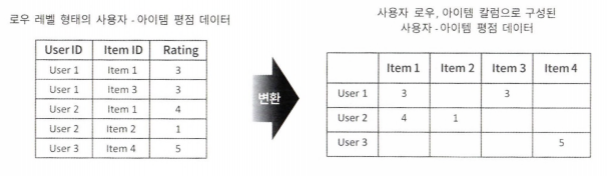

* 최근접 이웃 협업 필터링은 메모리(Memory) 협업 필터링이라고도 하며. 일반적으로 사용자 기반과 아이템 기반으로 다시 나뉠 수 있다.
> * 사용자 기반(User-User)： 당신과 비슷한 고객들이 다음 상품도 구매했습니다(Customers like you also bought these items).
> * 아이템 기반(Item—Item): 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다(customers who bought this item
also bought these items).

* 사용자 기반 최근접 이웃 방식 : 특정 사용자와 유사한 다른 사용자를 TOP-N으로 선정해 이 TOP-N 사용자가 좋아하는 아이템을 추천하는 방식. 즉, 특정 사용자와 타 사용자 간의 유사도 (Similarity)를 측정한 뒤 가장 유사도가 높은 TOP-N 사용자를 추출해 그들이 선호하는 아이템을 추천하는 것
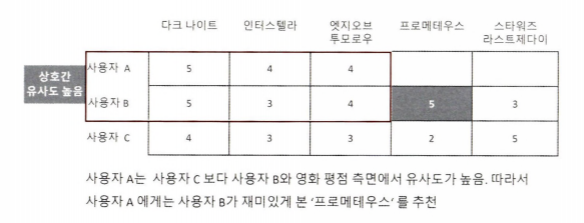

* 아이템 기반 최근접 이웃 방식 : 명칭이 주는 이미지 때문에 ‘아이템 간의 속성’이 얼마나 비슷한지를 기반으로 추천한다고 착각할 수 있다. 하지만 아이템 기반 최근접 이웃 방식은 아이템이 가지는 속성과는 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘. 다음 그림은 아이템 기반 최근접 이웃 방식의 기반 데이터 세트이다. 위의 사용자 기반 최근접 이웃 데이터 세트와 행과 열이 서로 반대（행이 개별 아이템이고 열이 개별 사용자입니다）.
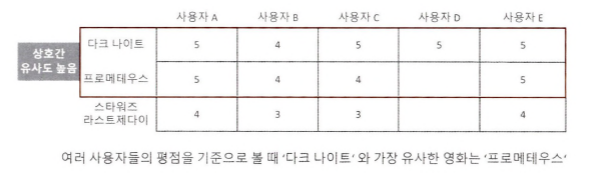


일반적으로 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 더 높다. 이유는 비슷한 영화（또는 상품）를 좋아（또는 구입）한다고 해시 사람들의 취향이 비슷하다고 판단하기는 어려운 경우가 많기 때문이다. 매우 유명한 영화는 취향과 관계없이 대부분의 사람이 관람하는 경우가 많고, 사용자들
이 평점을 매긴 영화（또는 상품）의 개수가 많지 않은 경우가 일반적인데 이를 기반으로 다른 사람과의 유사도를 비교하기가 어려운 부분도 있다. 따라서 최근접 이웃 협업 필터링은 대부분 아이템 기반의 알고리즘을 적용한다.




#### 04. 잠재 요인 협업 필터링

* 잠재 요인 협업 필터링 : 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
* 행렬 분해(Matrix Factorization) : 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인을 추출하는 기법.

잠재 요인 협업 필터링은 사용자-아이템 평점 행렬 데이터만을 이용해 말 그대로 ‘잠재 요인’을 끄집어내는 것을 의미한다. ‘잠재 요인’이 어떤 것인지는 명확히 정의할 수 없지만 이러한 ‘잠재 요인’을 기반으로 
* 다차원 희소 행렬인 사용자-아이템 행렬 데이터를 저차원 밀집 행렬의 사용자一잠재 요인 행렬과 아이템-잠재 요인 행렬의 전치 행렬（즉. 잠재 요인-아이템 행렬）로 분해할 수 있으며,<br> 
* 이렇게 분해된 두 행렬의 내적을 통해 새로운 예측 사용자-아이템 평점 행렬 데이터를 만들어서 사용자가 아직 평점을 부여하지 않는 아이템에 대한 예측 평점을 생성하는 것<br>
**=> 잠재 요인 협력 필터링 알고리즘의 골자**

<이러한 행렬 분해 기법을 이용해 사용자-잠재 요인 행렬과 아이템잠재 요인 행렬의 전치 행렬（즉, 잠재 요인-아이템 행렬）로 분해된 데이터 세트를 다시 내적 곱으로
결합하면서 사용자가 예측하지 않은 아이템에 대한 평점을 도출하는 방식을 개략적으로 나타낸 것>
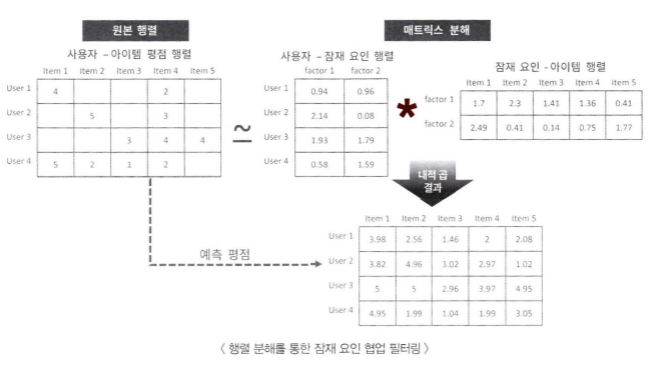

다음 그림의 사용자-아이템 평점 행렬 R에서 사용자（User）의 아이템（Item）에 대한 평점을 R（u, i）라고 하겠습니다. 여기서 u는 사용자 아이디, 노는 아이템 아이디입니다. R（1, 1）은 4점이며. R（1, 4）는 2점입니다. 사용자-잠재 요인 행렬을 사용자의 영화 장르별 선호도 행렬 끄로 가정하고 factor 1을 액션（Action） 선호도. factor 2를 로맨스（Romance） 선호도로 설정하겠습니다（설명상 편의를 위해 세상에 영화 장르가 액션과 로맨스밖에 없다고 가정합니다）. P（u, k）에서 u는 사용자 아이디, 누는 잠재 요인 칼럼인 장르별 선호도입니다. 다음 그림에서 P（1, 1）은 0.94, P（1, 2）는 0.96입니다.
아이템-잠재 요인 행렬은 영화별로 여러 장르 요소로 구성된 영화의 장르별 요소 행렬 Q로 가정하고 factor 1은 영화의 Action 요소 값, factor 2는 Romance 요소 값입니다. Q（i, k）에서 두는 아이템 아이디, k는 잠재 요인  칼럼인 장르별 요소입니다. Q는 P와의 내적 계산을 통해 예측 평점을 계산하기 위해 Q의 행과 열 위치를 서로 교환한 Q.T로 변환합니다. 즉, Q（i, k)는 Q.T（k, i）입니다. Q.T（l.l）은
1.7, Q.T（2,1）은 2.49입니다.
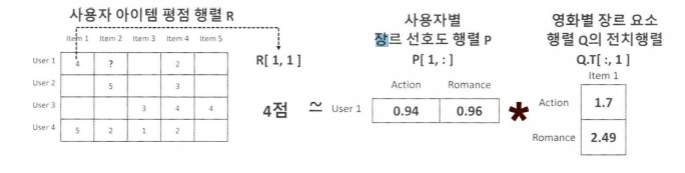

평점이란 사용자의 특정 영화 장르에 대한 선호도와 개별 영화의 그 장르적 특성값을 반영해 결정된다고 생각할 수 있습니다.
평점은 사용자의 장르별 선호도 벡터와 영화의 장르별 특성 벡터를 서로 곱해서 만들 수 있습니다. 즉, User 1 의 item 1 의 평점인 R（1, 1）의 4점은 P 매트릭스의 User 1 벡터와Q.T 매트릭스의 Item 1 벡터를 곱한 값입니다.
마찬가지 방법으로, 아직 User 1이 평점을 매기지 못한 Hem 2에 대해 예측 평점을 수행해 보겠습니다. 즉, R（l, 2）는 행렬 분해된 P 매트릭스의 User 1 벡터와 Q.T 매트릭스의 Item 2 벡터의 내적 결괏값인 2.56으로 예측할 수 있습니다.
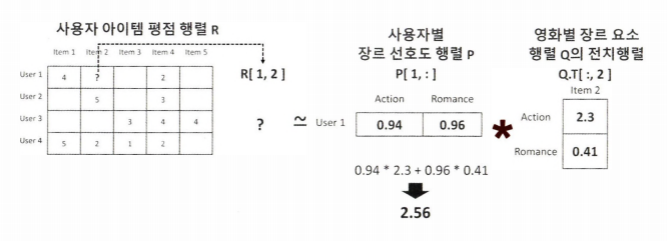

**=>> 이처럼 잠재 요인 협업 필터링은 숨겨져 있는 ‘잠재 요인’을 기반으로 분해된 매트릭스를 이용해 사용자가 아직 평가하지 않은 아이템에 대한 예측 평가를 수행하는 것**


***행렬 분해의 이해***

행렬 분해는 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법으로서 대표적으로 SVD(Singular Vector Decomposition), NMF(Non-Negative Matrix Factorization) 등이 있다.

M개의 사용자(User) 행과 N개의 아이템(Item) 열을 가진 평점 행렬 R은 M X N 차원으로 구성되며, 행렬 분해를 통해서 사용자-K 차원 잠재 요인 행렬 P(P는 M X K 차원)와 K 차원 잠재 요인 - 아이템 행렬 Q.T(Q.T는 K X N 차원)로 분해될 수 있다(Q는 아이템-잠재 요인 행렬이며. Q.T는 Q의 전치 행렬인 잠재 요인-아이템 행렬).
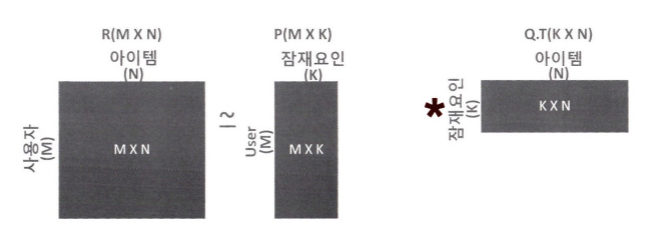<br>
즉, $R = P*Q.T$이며 각 기호에 대한 설명은 다음과 같다
> * M은 총사용자 수
> * N은 총아이템수
> * K는잠재 요인의차원수
> * R은 M X N 차원의 사용자-아이템 평점 행렬
> * P는 사용자와 잠재 요인과의 관계 값을 가지는 MXK 차원의 사용자-잠재 요인 행렬
> * Q는 아이템과 잠재 요인과의 관계 값을 가지는 NXK 차원의 아이템一잠재 요인 행렬
> * Q.T는 Q 매트릭스의 행과 열 값을 교환한 전치 행렬

> EX) 행렬 내에 널(NaN) 값을 많이 가지는 고차원의 희소 행렬인 R 행렬은 다음 그림과 같이 저차원의 밀집 행렬인 P 행렬과 Q 행렬로 분해될 수 있다.
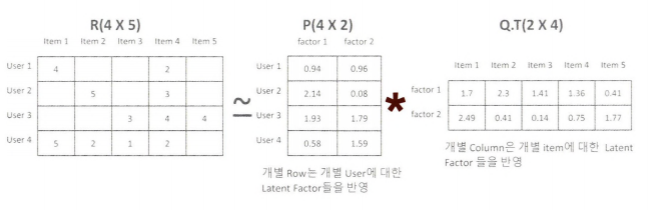


* R 행렬의 u행 사용자와 i열 아이템 위치에 있는 평점 데이터를 $r_{(u,i)}$라고 하면<br>$r_{(u,i)}=p_{u} * q_{i}^{t}$로 유추할 수 있다.
> * $p_{u}$ : P 행렬에서 11행 사용자의 벡터
> * $q_{i}^{t}$ : Q 행렬의 i행 아이템 벡터의 전치 벡터
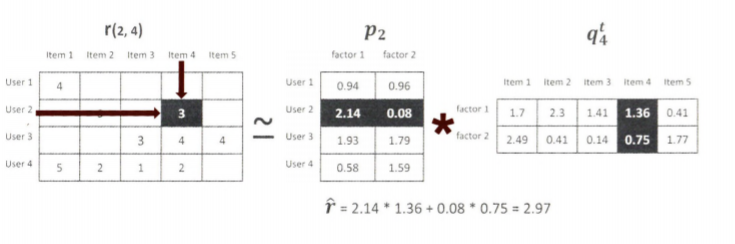
사용자가 평가하지 않은 아이템(영화)에 대한 평점도 잠재 요인으로 분해된 P 행렬과 Q 행렬을 이용해 예측할 수 있다.
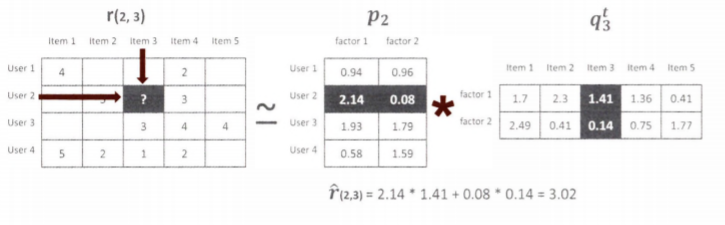
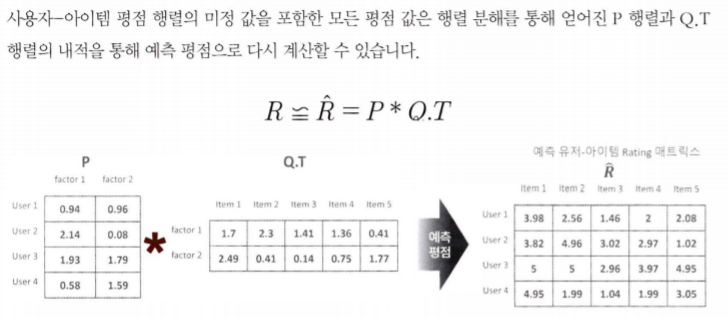

행렬 분해는 주로 SVD(Singular Value Decomposition) 방식을 이용하지만 SVD는 널(NaN) 값이 없는 행렬에만 적용할 수 있다. R 행렬에는 아직 평점이 되지 않은 많은 널 값이 있기 때문에 P와 Q 행렬을 일반적인 SVD 방식으로는 분해할 수가 없다. <br>이러한 경우에는 확률적 경사 하강법(Stochastic Gradient Descent, SGD)이나 ALS(Alternating Least Squares) 방식을 이용해 SVD를 수행한다.


***확률적 경사 하강법을 이용한 행렬 분해***

확률적 경사 하강법을 이용한 행렬 분해 방법은 P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인
비용 함수 최적화를 통해 P와 Q를 유추해내는 것이다.
* 확률적 경사 하강법(이하 SGD)을 이용한 행렬 분해의 전반적인 절차
> 1)P와 Q를 임의의 값을 가진 행렬로 설정합니다.<br>
>2) P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산합니다.<br>
>3) 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트합니다.<br>
>4) 만족할 만한 오류 값을 가질 때까지 2. 3번 작업을 반복하면서 P와 Q 값을 업데이트해 근사화합니다.<br>

실제 값과 예측값의 오류 최소화와 L2 규제(Regularization)를 고려한 비용 함수식<br>
: $min\sum (r_{(u,i)}-p_{u}q_{i}^t)^2 + \lambda(\parallel q_{i} \parallel^2+\parallel p_{u} \parallel^2)$<br>

일반적으로 사용자-아이템 평점 행렬의 경우 행렬 분해를 위해서 단순히 예측 오류값의 최소화와 학습시 과적합을 피하기 위해서 규제를 반영한 비용 함수를 적용한다. 그리고 위의 비용 함수를 최소화하기 위해서 새롭게 업데이트되는 $p_{u}'$와$q_{i}'$는 다음과 같이 계산<br>
: $p_{u}' = p_{u}+\eta(e_{(u,i)}*q_{i} - \lambda*p_{u})$<br>
  $q_{i}' = q_{i}+\eta(e_{(u,i)}*p_{u} - \lambda*q_{i})$<br>
> * $p_{u}'$ : P 행렬의 사용자 u행 벡터
> * $q_{i}'$ : Q 행렬의 아이템 i행의 전치 벡터(transpose vector)
> * $r_{(u,i)}$ : 실제 R 행렬의 u행, i열에 위치한 값
> * $\hat(r_{(u,i)})$ : $\hat(R)$ 행렬의 u행, i열에 위치한 값 $p_{u}*q_{i}'$로 계산
> * $e_{(u,i)}$ : u행 i열에 위치한 실제 행렬 값과 예측 행렬 값의 차이 오류. $r_{(u,i)}-\hat(r_{(u,i)})$로 계산
> * $\eta$ : SGD 학습률 
> * $\lambda$ :  L2 규제(Regularization) 계수

#### 경사하강을 이용한 행렬 분해

In [1]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3 설정. 
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])
num_users, num_items = R.shape
K=3

# P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 random한 값으로 입력합니다. 
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [2]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [3]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장. 
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

steps=1000
learning_rate=0.01
r_lambda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트. 
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0 :
        print("### iteration step : ", step," rmse : ", rmse)

### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.4876723101369648
### iteration step :  100  rmse :  0.1564340384819247
### iteration step :  150  rmse :  0.07455141311978046
### iteration step :  200  rmse :  0.04325226798579314
### iteration step :  250  rmse :  0.029248328780878973
### iteration step :  300  rmse :  0.022621116143829466
### iteration step :  350  rmse :  0.019493636196525135
### iteration step :  400  rmse :  0.018022719092132704
### iteration step :  450  rmse :  0.01731968595344266
### iteration step :  500  rmse :  0.016973657887570753
### iteration step :  550  rmse :  0.016796804595895633
### iteration step :  600  rmse :  0.01670132290188466
### iteration step :  650  rmse :  0.01664473691247669
### iteration step :  700  rmse :  0.016605910068210026
### iteration step :  750  rmse :  0.016574200475705
### iteration step :  800  rmse :  0.01654431582921597
### iteration step :  850  rmse :  0.01651375177473524
### iterati

In [4]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


---
### 05. 콘텐츠 기반 필터링 실습 - TMDB 5000 영화 데이터 세트

In [5]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

movies =pd.read_csv('C:\\Users\\Administrator\\Downloads\\tmdb_5000_movies.csv')
print(movies.shape)
movies.head(1)

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                 'popularity', 'keywords', 'overview']]

In [7]:
pd.set_option('max_colwidth', 100)
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."


In [8]:
from ast import literal_eval

movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

In [9]:
movies_df['genres'] = movies_df['genres'].apply(lambda x : [ y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [ y['name'] for y in x])
movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


***장르 콘텐츠 유사도 측정***

가장 간단한 방법은 genres를 문자열로 변경한 뒤 이를 CoimtVectorizer로 피처 벡터화한 행렬 데이터 값을 코사인 유사도로 비교하는 것

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열로 변환. 
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


In [12]:
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1])

[[   0 3494  813 ... 3038 3037 2401]]


***장르 콘텐츠 필터링을 이용한 영화 추천***

In [13]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    
    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_movie = df[df['title'] == title_name]
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]

In [14]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


In [15]:
movies_df[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


***가중 평점(Weighted Rating) = (v/(v+m)) * R + (m/(v+m)) * C***
* V： 개별 영화에 평점을 투표한 횟수
* m： 평점을 부여하기 위한 최소 투표 횟수
* R： 개별 영화에 대한 평균 평점.
* C： 전체 영화에 대한 평균 평점.

In [16]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C:',round(C,3), 'm:',round(m,3))

C: 6.092 m: 370.2


In [17]:
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ( (v/(v+m)) * R ) + ( (m/(m+v)) * C )   

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)

In [18]:
movies_df[['title','vote_average','weighted_vote','vote_count']].sort_values('weighted_vote',
                                                                          ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


In [19]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
    
    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출 
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
# 기준 영화 index는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427


---
### 06. 아이템 기반 최근접 이웃 협업 필터링 실습

In [23]:
import pandas as pd
import numpy as np

movies = pd.read_csv('C:\\Users\\Administrator\\Downloads\\ml-latest-small\\ml-latest-small\\movies.csv')
ratings = pd.read_csv('C:\\Users\\Administrator\\Downloads\\ml-latest-small\\ml-latest-small\\ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [24]:

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:

ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
ratings_matrix.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

# NaN 값을 모두 0 으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 영화와 영화들 간 유사도 산출

In [28]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [30]:
item_sim_df["Godfather, The (1972)"].sort_values(ascending=False)[:6]

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [31]:
item_sim_df["Inception (2010)"].sort_values(ascending=False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

#### 아이템 기반 인접 이웃 협업 필터링으로 개인화된 영화 추천

아이템 기반의 협업 필터링에서 개인화된 예측 평점<br>
: $\hat(R_{u,i}) = \sum N (S_{i,N}* R_{u,N}) / \sum N(|S_{i,N}|)$
* $\hat(R_{u,i})$ : 사용자 u, 아이템 의 개인화된 예측 평점 값
* $S_{i,N}$ : 아이템 i와 가장 유사도가 높은 Top-N개 아이템의 유사도 벡터
* $R_{u,N}$ : 사용자 u의 아이템 i와 가장 유사도가 높은 Top-N개 아이템에 대한 실제 평점 벡터
* N 값은 아이템의 최근접 이웃 범위 계수(item neighbor)를 의미

In [32]:
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [33]:
ratings_pred = predict_rating(ratings_matrix.values , item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


In [34]:
from sklearn.metrics import mean_squared_error

# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE 를 구함. 
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

아이템 기반 모든 인접 이웃 MSE:  9.895354759094706


In [35]:
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape)

    # 사용자-아이템 평점 행렬의 열 크기만큼 Loop 수행. 
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        # 개인화된 예측 평점을 계산
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T) 
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))        
    return pred

In [36]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)
print('아이템 기반 인접 TOP-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))


# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

아이템 기반 인접 TOP-20 이웃 MSE:  3.69501623729494


In [37]:
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[ user_rating_id > 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Austin Powers in Goldmember (2002)                                                5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Producers, The (1968)                                                             5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Back to the Future (1985)                                                         5.0
Glengarry Glen Ross (1992)                                                        4.0
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                                     4.0
Name: 9, dtype: float64

In [38]:
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [39]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies
    
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


---
### 07. 행렬 분해를 이용한 잠재 요인 협업 필터링 실습

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적 곱으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [41]:
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다. 
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    break_count = 0
       
    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
    non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]
   
    # SGD기법으로 P와 Q 매트릭스를 계속 업데이트. 
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
       
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
            
    return P, Q

In [43]:
import pandas as pd
import numpy as np

movies = pd.read_csv('C:\\Users\\Administrator\\Downloads\\ml-latest-small\\ml-latest-small\\movies.csv')
ratings = pd.read_csv('C:\\Users\\Administrator\\Downloads\\ml-latest-small\\ml-latest-small\\ratings.csv')
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')

# title 컬럼을 얻기 이해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

In [44]:
P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=200, learning_rate=0.01, r_lambda = 0.01)
pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  2.9023619751336867
### iteration step :  10  rmse :  0.7335768591017927
### iteration step :  20  rmse :  0.5115539026853442
### iteration step :  30  rmse :  0.37261628282537446
### iteration step :  40  rmse :  0.2960818299181014
### iteration step :  50  rmse :  0.2520353192341642
### iteration step :  60  rmse :  0.22487503275269854
### iteration step :  70  rmse :  0.20685455302331537
### iteration step :  80  rmse :  0.19413418783028685
### iteration step :  90  rmse :  0.18470082002720403
### iteration step :  100  rmse :  0.17742927527209104
### iteration step :  110  rmse :  0.1716522696470749
### iteration step :  120  rmse :  0.1669518194687172
### iteration step :  130  rmse :  0.16305292191997542
### iteration step :  140  rmse :  0.15976691929679643
### iteration step :  150  rmse :  0.1569598699945732
### iteration step :  160  rmse :  0.15453398186715428
### iteration step :  170  rmse :  0.15241618551077643
### iteration step :  180  rm

In [45]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.055084,4.092018,3.564130,4.502167,3.981215,1.271694,3.603274,2.333266,5.091749,3.972454,...,1.402608,4.208382,3.705957,2.720514,2.787331,3.475076,3.253458,2.161087,4.010495,0.859474
2,3.170119,3.657992,3.308707,4.166521,4.311890,1.275469,4.237972,1.900366,3.392859,3.647421,...,0.973811,3.528264,3.361532,2.672535,2.404456,4.232789,2.911602,1.634576,4.135735,0.725684
3,2.307073,1.658853,1.443538,2.208859,2.229486,0.780760,1.997043,0.924908,2.970700,2.551446,...,0.520354,1.709494,2.281596,1.782833,1.635173,1.323276,2.887580,1.042618,2.293890,0.396941


In [46]:
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [47]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [48]:
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
Rear Window (1954),5.704612
"South Park: Bigger, Longer and Uncut (1999)",5.451100
Rounders (1998),5.298393
Blade Runner (1982),5.244951
Roger & Me (1989),5.191962
Gattaca (1997),5.183179
Ben-Hur (1959),5.130463
Rosencrantz and Guildenstern Are Dead (1990),5.087375
"Big Lebowski, The (1998)",5.038690


---
### 08. 파이썬 추천 시스템 패키지 — Surprise

Surprise는 파이썬 기반에서 사이킷런과 유사한 API와 프레임워크를 제공합니다. 따라서 추천 시스템의 전반적인 알고리즘을 이해하고 사이킷런 사용 경험이 있으면 쉽게 사용할 수 있다.
* 주요 장점
> * 다양한 추천 알고리즘, 예를 들어 사용자 또는 아이템 기반 최근접 이웃 협업 필터링, SVD, SVD++, NMF 기반의 잠재 요
인 협업 필터링을 쉽게 적용해 추천 시스템을 구축할 수 있습니다.
> * Surprise의 핵심 API는 사이킷런의 핵심 AI기와 유사한 API명으로 작성됐습니다. 예를 들어 fit( ). predict ) APL로 추
천 데이터 학습과 예측, train_test_split( )으루 추천 학습 데이터 세트와 예측 데이터 세트 분리. cross_validate( ).
GridSearchCV 클래스를 통해 추천 시스템을 위한 모델 셀렉션, 평가, 하이퍼 파라미터 튜닝 등의 기능을 제공합니다.


In [49]:
import surprise 
from surprise import SVD
from surprise import Dataset 
from surprise import accuracy 
from surprise.model_selection import train_test_split

In [50]:
data = Dataset.load_builtin('ml-100k') 
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\Administrator/.surprise_data/ml-100k


In [51]:
algo = SVD()
algo.fit(trainset)

In [52]:
predictions = algo.test( testset )
print('prediction type :',type(predictions), ' size:',len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type : <class 'list'>  size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.691991813467798, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.705707305506705, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.054191985450693, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.4039506443621894, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.2251276456948292, details={'was_impossible': False})]

In [53]:
[ (pred.uid, pred.iid, pred.est) for pred in predictions[:3] ]

[('120', '282', 3.691991813467798),
 ('882', '291', 3.705707305506705),
 ('535', '507', 4.054191985450693)]

In [54]:
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함. 
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.14   {'was_impossible': False}


In [55]:
accuracy.rmse(predictions)

RMSE: 0.9492


0.9491839577460947

#### Surprise 주요 모듈 소개

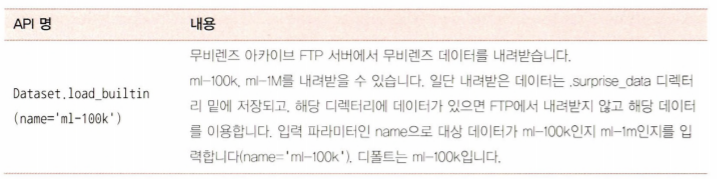
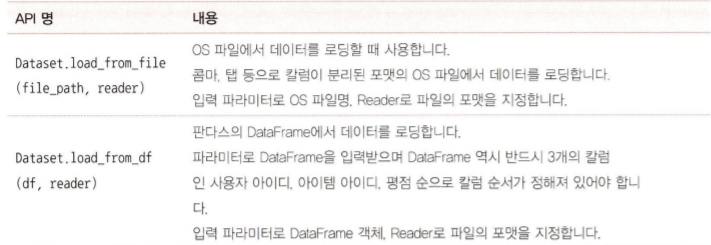

In [56]:
import pandas as pd

ratings = pd.read_csv('C:\\Users\\Administrator\\Downloads\\ml-latest-small\\ml-latest-small\\ratings.csv')
# ratings_noh.csv 파일로 unload 시 index 와 header를 모두 제거한 새로운 파일 생성.  
ratings.to_csv('C:\\Users\\Administrator\\Downloads\\ml-latest-small\\ml-latest-small\\ratings_noh.csv', index=False, header=False)

In [57]:
from surprise import Reader

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
data=Dataset.load_from_file('C:\\Users\\Administrator\\Downloads\\ml-latest-small\\ml-latest-small\\ratings_noh.csv',reader=reader)

In [58]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

# 수행시마다 동일한 결과 도출을 위해 random_state 설정 
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습 후 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

In [60]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('C:\\Users\\Administrator\\Downloads\\ml-latest-small\\ml-latest-small\\ratings.csv') 
reader = Reader(rating_scale=(0.5, 5.0))

# ratings DataFrame 에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 합니다. 
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

***Surprise 추천 알고리즘 클래스***

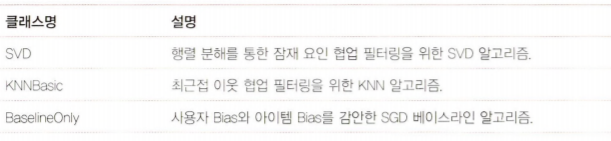
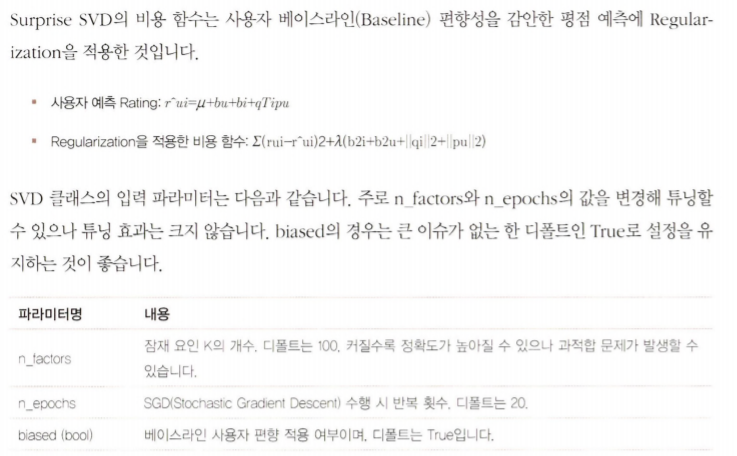

#### 교차 검증(Cross Validation)과 하이퍼 파라미터 튜닝

In [61]:
from surprise.model_selection import cross_validate 

# Pandas DataFrame에서 Surprise Dataset으로 데이터 로딩 
ratings = pd.read_csv('C:\\Users\\Administrator\\Downloads\\ml-latest-small\\ml-latest-small\\ratings.csv') # reading data in pandas df
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0) 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8724  0.8729  0.8735  0.8726  0.8834  0.8750  0.0042  
MAE (testset)     0.6709  0.6706  0.6680  0.6725  0.6800  0.6724  0.0041  
Fit time          10.16   10.13   10.75   8.05    10.59   9.94    0.97    
Test time         0.34    0.21    0.16    0.32    0.34    0.28    0.08    


{'test_rmse': array([0.8724035 , 0.87288946, 0.87345643, 0.87262857, 0.88337819]),
 'test_mae': array([0.67085041, 0.67056714, 0.66798929, 0.67254846, 0.6800387 ]),
 'fit_time': (10.164977073669434,
  10.13019323348999,
  10.753914833068848,
  8.053847074508667,
  10.585253715515137),
 'test_time': (0.34249329566955566,
  0.21038055419921875,
  0.16057467460632324,
  0.3249988555908203,
  0.3399217128753662)}

In [62]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터들을 딕셔너리 형태로 지정. 
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200] }

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8783763629335608
{'n_epochs': 20, 'n_factors': 50}


#### Surprise 를 이용한 개인화 영화 추천 시스템 구축

In [67]:
# # 아래 코드는 train_test_split( )으로 분리되지 않는 Dataset에 fit( )을 호출하여 오류를 발생합니다.
# data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
# algo = SVD(n_factors=50, random_state=0)
# algo.fit(data)

In [64]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성. 
data_folds = DatasetAutoFolds(ratings_file='C:\\Users\\Administrator\\Downloads\\ml-latest-small\\ml-latest-small\\ratings_noh.csv', reader=reader)

#전체 데이터를 학습데이터로 생성함. 
trainset = data_folds.build_full_trainset()

In [66]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [68]:
# 영화에 대한 상세 속성 정보 DataFrame로딩
movies = pd.read_csv('C:\\Users\\Administrator\\Downloads\\ml-latest-small\\ml-latest-small\\movies.csv')

# userId=9 의 movieId 데이터 추출하여 movieId=42 데이터가 있는지 확인. 
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [69]:
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


In [70]:
def get_unseen_surprise(ratings, movies, userId):
    #입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()
    
    # 모든 영화들의 movieId를 리스트로 생성. 
    total_movies = movies['movieId'].tolist()
    
    # 모든 영화들의 movieId중 이미 평점을 매긴 영화의 movieId를 제외하여 리스트로 생성
    unseen_movies= [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), \
          '전체 영화수:',len(total_movies))
    
    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742


In [71]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    
    # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
    # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]
    # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함.
    # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
    def sortkey_est(pred):
        return pred.est
    
    # sortkey_est( ) 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions= predictions[:top_n]
    
    # top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
    top_movie_ids = [ int(pred.iid) for pred in top_predictions]
    top_movie_rating = [ pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    top_movie_preds = [ (id, title, rating) for id, title,
    rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]
    
    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)
print('##### Top-10 추천 영화 리스트 #####')

for top_movie in top_movie_preds:
    print(top_movie[1], ":", top_movie[2])

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742
##### Top-10 추천 영화 리스트 #####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122658
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957


---
### 09. 정리

* 콘텐츠 기반 필터링은 아이템（상품, 영화, 서비스 등）을 구성하는 여러 가지 콘텐츠 중 사용자가 좋아하는 콘텐츠를 필터링하여 이에 맞는 아이템을 추천하는 방식입니다. 
>예를 들어 영화 추천의 경우 사용자가 좋아하는 영화를 분석한 뒤, 이 영화의 콘텐츠와 유사한 다른 영화를 추천하는 것입니다. 영화의 경
우 이러한 콘텐츠의 예는 장르, 감독, 영화배우, 영화 키워드와 같은 요소들이 될 수 있습니다. 이들 요소들을 결합하여, 하나의 콘텐츠 특징으로 피처 벡터화한 뒤에 이들 피처 벡터와 가장 유사한 다른 피처 벡터를 가진 영화를 추천하는 것입니다.

* 협업 필터링은 최근접 이웃 협업 필터링과 잠재 요인 협업 필터링으로 나뉩니다. 
> * 최근접 이웃 협업 필터링은 다시 사용자 기반（사용자-사용자）과 아이템 기반（아이템-아이템）으로 나뉘며, 이중 아이템 기
반이 더 많이 사용됩니다. 
> * 아이템 기반 최근접 이웃 방식은 특정 아이템과 가장 근접하게 유사한 다른 아이템들을 추천하는 방식입니다. 
>> 이 유사도의 기준이 되는 것은 사용자들의 아이템에 대한 평가를 벡터화한 값입니다. 이를 위해 모든 아이템을 행으로, 모든 사용자를 열로, 그리고 사용자별-아이템 평점을 값으로 하는 아이템-사용자 행렬 데이터 세트를 만들고, 아이템 별로 코사인 유사도를 이용해 사
용자 평점 피처 벡터에 따른 TOP-N 유사 아이템을 추천하는 예제를 구현해 봤습니다.

* 잠재 요인 협업 필터링은 많은 추천 시스템에서 활용하는 방식입니다. 
>사용자一아이템 평점 행렬 데이터에 숨어 있는 잠재 요인을 추출하여 사용자가 아직 평점을 매기지 않은 아이템에 대한 평점을 예측하여 이를 추천에 반영하는 방식입니다. 이렇게 잠재 요인을 추출하기 위해서 다차원의 사용자-아이템 평점 행렬을 저차원의 사용자-잠재요인, 아이템-잠재요인 행렬로 분해하는데, 이러한 기법을 행렬 분해라고 합니다. 그리고 이러한 행렬 분해 기법을 경사 하강법으로 구현한 예제를 실습해 봤습니다.

마지막으로 파이썬의 추천 시스템 패키지 중 하나인 Surprise를 소개했습니다. Surprise는 사이킷런과 유사한 API를 지향하며, 간단한 API만을 이용해 파이썬 기반에서 추천 시스템을 구현해 줍니다. 추천 시스템이 가지는 엄청난 가치로 인해 많은 기업들이 이의 추천 예측 성능 향상을 위해 엄청난 노력을 기울이고 있습니다.
